<a href="https://colab.research.google.com/github/mvadrev/Titanic/blob/main/Decision_trees_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn 
from sklearn.datasets import load_iris
import numpy as np
irisDataSet =  sklearn.datasets.load_iris()
import pandas as pd


In [5]:
data = np.c_[irisDataSet.data, irisDataSet.target]
columns = np.append(irisDataSet.feature_names, ["target"])
inspectionDataset = pd.DataFrame(data, columns=columns)
pd.DataFrame(data, columns=columns).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
inspectionDataset.info()
#No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [48]:
from sklearn.model_selection import train_test_split
inputValues = inspectionDataset[['sepal length (cm)','sepal width (cm)','petal length (cm)']].values
inspectionDataset[['sepal length (cm)','sepal width (cm)','petal length (cm)']].head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)
0                  5.1               3.5                1.4
1                  4.9               3.0                1.4
2                  4.7               3.2                1.3
3                  4.6               3.1                1.5
4                  5.0               3.6                1.4
..                 ...               ...                ...
145                6.7               3.0                5.2
146                6.3               2.5                5.0
147                6.5               3.0                5.2
148                6.2               3.4                5.4
149                5.9               3.0                5.1

[150 rows x 3 columns]>

In [49]:
targetValues = inspectionDataset[['target']].values
inspectionDataset[['target']].head

<bound method NDFrame.head of      target
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
..      ...
145     2.0
146     2.0
147     2.0
148     2.0
149     2.0

[150 rows x 1 columns]>

In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(inputValues, targetValues)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(xTrain, yTrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [52]:
predictions = model.predict(xTrain)
accuracy_score(predictions,yTrain)

1.0

In [53]:
predictions = model.predict(xTest)
accuracy_score(predictions,yTest)

0.868421052631579

[Text(418.5, 520.95, 'X[2] <= 2.45\nentropy = 1.578\nsamples = 112\nvalue = [42, 33, 37]'),
 Text(279.0, 475.65000000000003, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(558.0, 475.65000000000003, 'X[2] <= 4.75\nentropy = 0.998\nsamples = 70\nvalue = [0, 33, 37]'),
 Text(418.5, 430.35, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(697.5, 430.35, 'X[2] <= 5.15\nentropy = 0.384\nsamples = 40\nvalue = [0, 3, 37]'),
 Text(558.0, 385.05, 'X[0] <= 5.95\nentropy = 0.722\nsamples = 15\nvalue = [0, 3, 12]'),
 Text(418.5, 339.75, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(697.5, 339.75, 'X[2] <= 4.85\nentropy = 0.881\nsamples = 10\nvalue = [0, 3, 7]'),
 Text(558.0, 294.45, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(837.0, 294.45, 'X[0] <= 6.8\nentropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(697.5, 249.14999999999998, 'X[0] <= 6.5\nentropy = 0.985\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(558.0, 203.84999999999997, 'X[1] <= 2.75\nentropy 

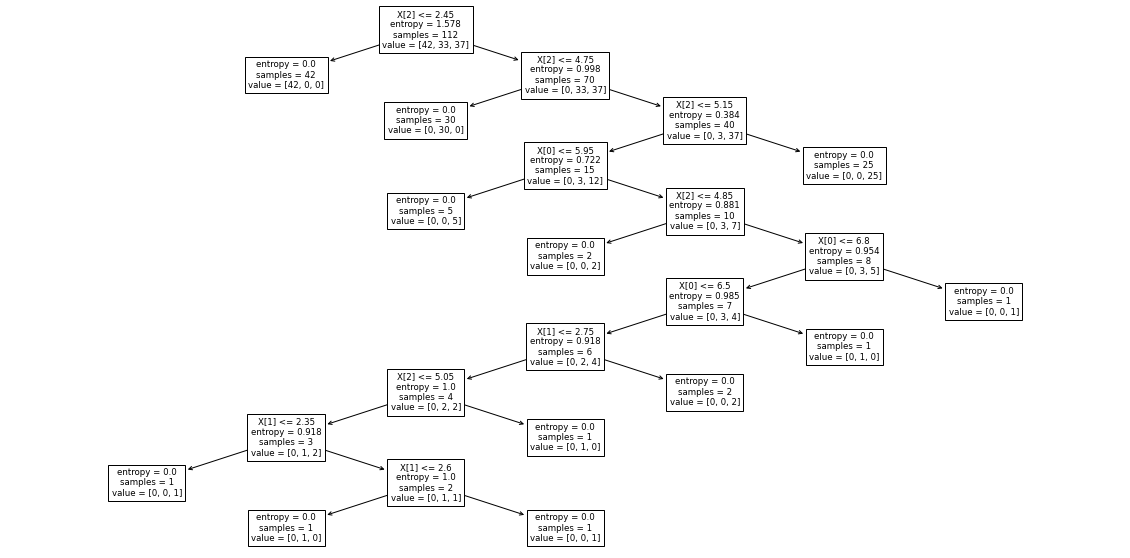

In [54]:
import matplotlib.pyplot as plt
from sklearn import  tree
plt.figure(figsize=(20 ,10))
tree.plot_tree(model)

In [55]:
ccp_params = model.cost_complexity_pruning_path(xTrain,yTrain)
alphas, impurity = ccp_params.ccp_alphas, ccp_params.impurities
alphas

array([0.        , 0.01124096, 0.01800011, 0.04056732, 0.48627294,
       0.954434  ])

In [56]:
#Score classifier using values of alpha extracted from dataset
scores = []

for alpha in alphas:
  print("Alpha is",alpha)
  tempModel = DecisionTreeClassifier(criterion='entropy',random_state=1, ccp_alpha=alpha)
  tempModel.fit(xTrain, yTrain)
  predTemp = tempModel.score(xTest, yTest)
  scoreTemp = accuracy_score(predictions,yTest)
  scores.append(scoreTemp)
scores

Alpha is 0.0
Alpha is 0.011240955347330262
Alpha is 0.018000110991102755
Alpha is 0.04056732447990577
Alpha is 0.4862729370891757
Alpha is 0.954434002924965


[0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579]